In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import uproot
from astropy.table import Table

In [2]:
f = uproot.open('../../Reduced_data/L2Reduced_CALIBOnly-AdcCon45-Special.root')
t = f['L2']['fTime'].array(library="np")
X = f['L2']['fCal/DetBranch/fX'].array(library="np")
Y = f['L2']['fCal/DetBranch/fY'].array(library="np")
Z = f['L2']['fCal/DetBranch/fZ'].array(library="np")
Adc = f['L2']['fCal/DetBranch/fAdc'].array(library="np")


In [10]:
Adc[0][0]

-99999.0

In [8]:
t[-1]

1549951494.184041

In [3]:
x_all, y_all, xz_all, yz_all = [], [], [], []
MeV_xz_all, MeV_yz_all = [],[]
for i in range(len(Adc)):
    
    x_idx = np.where(abs(X[i])>0.001)[0]
    y_idx = np.where(abs(Y[i])>0.001)[0]
    x_pos = X[i][x_idx]
    y_pos = Y[i][y_idx]
    xz_pos = Z[i][x_idx]
    yz_pos = Z[i][y_idx]
    
    MeV_xz = Adc[i][x_idx]
    invalid_x_idx = np.where(MeV_xz<0)[0] #set -9999 Adc to 0
    MeV_xz[invalid_x_idx] = -1
    
    MeV_yz = Adc[i][y_idx]
    invalid_y_idx = np.where(MeV_yz<0)[0] #set -9999 Adc to 0
    MeV_yz[invalid_y_idx] = -1
        
    x_all.append(x_pos)
    y_all.append(y_pos)
    xz_all.append(xz_pos)
    MeV_xz_all.append(MeV_xz)
    yz_all.append(yz_pos)
    MeV_yz_all.append(MeV_yz)

x_all = np.array(x_all, dtype=object)
y_all = np.array(y_all, dtype=object)
xz_all = np.array(xz_all, dtype=object)
yz_all = np.array(yz_all, dtype=object)
MeV_xz_all = np.array(MeV_xz_all, dtype=object)
MeV_yz_all = np.array(MeV_yz_all, dtype=object)

#save images
xz_imgs, yz_imgs = [],[]
for i in range(len(xz_all)):
    x_pix, y_pix = np.round(x_all[i]/10-0.5)+25.5, np.round(y_all[i]/10-0.5)+25.5
    xz_pix = np.round(xz_all[i]/4.55)-0.5
    yz_pix = np.round(yz_all[i]/4.55)-0.5

    xz_img, buf, buf = np.histogram2d(x_pix, xz_pix, weights=MeV_xz_all[i], bins=(range(51), range(21)) )   
    yz_img, buf, buf = np.histogram2d(y_pix, yz_pix, weights=MeV_yz_all[i], bins=(range(51), range(21)) ) 

    xz_imgs.append(xz_img) #for xzyz_img, normalize at the last
    yz_imgs.append(yz_img)
    
    #xz_imgs.append(xz_img/xz_img.sum())
    #yz_imgs.append(yz_img/yz_img.sum())
    
xz_imgs = np.array(xz_imgs)
yz_imgs = np.array(yz_imgs)



#merge xz and yz imgs
xzyz_imgs_vertical_dummy = []
xzyz_imgs_vertical = []

for i in range(len(xz_imgs)):
    xzyz_imgs_vertical_dummy.append(np.rot90(np.append(yz_imgs[i], xz_imgs[i], axis=1),1))
       
xzyz_imgs_vertical_dummy = np.array(xzyz_imgs_vertical_dummy)

for i in range(len(xzyz_imgs_vertical_dummy)):
    if xzyz_imgs_vertical_dummy[i].sum() > 0:
        xzyz_imgs_vertical.append(xzyz_imgs_vertical_dummy[i]/xzyz_imgs_vertical_dummy[i].sum()) #sum norm

xzyz_imgs_vertical = np.array(xzyz_imgs_vertical)


In [4]:
for i in range(len(xzyz_imgs_vertical_dummy)):
    print(xzyz_imgs_vertical_dummy[i].sum())

-294.0
34688.142578125
-30.0
-36.0
-26.0
-23.0
-32.0
109.28125
2543.6171875
1665.080078125
1197.361328125
1622.701171875
1802.814453125
478.861328125
4656.45703125
2560.15625
2560.03125
2191.51953125
801.119140625
48457.28125
84885.05859375
-381.0
-377.0
68584.6328125
-21.0
7024.162109375
100620.986328125
-373.0
-353.0
-356.0
-377.0
3330.201171875
1883.673828125
64887.55078125
104303.052734375
-21.0
-18.0
-10.0
-28.0
-12.0
-20.0
-18.0
-15.0
-24.0
-25.0
-30.0
-19.0
-20.0
-22.0
-17.0
-24.0
-24.0
-19.0
-24.0
-29.0
-22.0
-14.0
-22.0
-383.0
-368.0
35552.8046875
1370.951171875
92484.728515625
241911.79638671875
-20.0
-29.0
-22.0
-19.0
-20.0
-19.0
-20.0
-16.0
-37.0
-17.0
-29.0
-25.0
-28.0
-29.0
-24.0
-19.0
-31.0
-41.0
-33.0
-17.0
-23.0
-20.0
-36.0
-24.0
-28.0
-35.0
-24.0
-28.0
-17.0
-19.0
-14.0
-21.0
-27.0
-22.0
-21.0
-20.0
-21.0
-21.0
-14.0
-18.0
-31.0
-21.0
-29.0
-33.0
-21.0
-26.0
-23.0
-17.0
-22.0
-28.0
-19.0
-31.0
-34.0
-24.0
-18.0
-35.0
-15.0
-20.0
-42.0
-13.0
-21.0
-36.0
-30.0
-30.0
-20

In [5]:
len(xzyz_imgs_vertical)

67

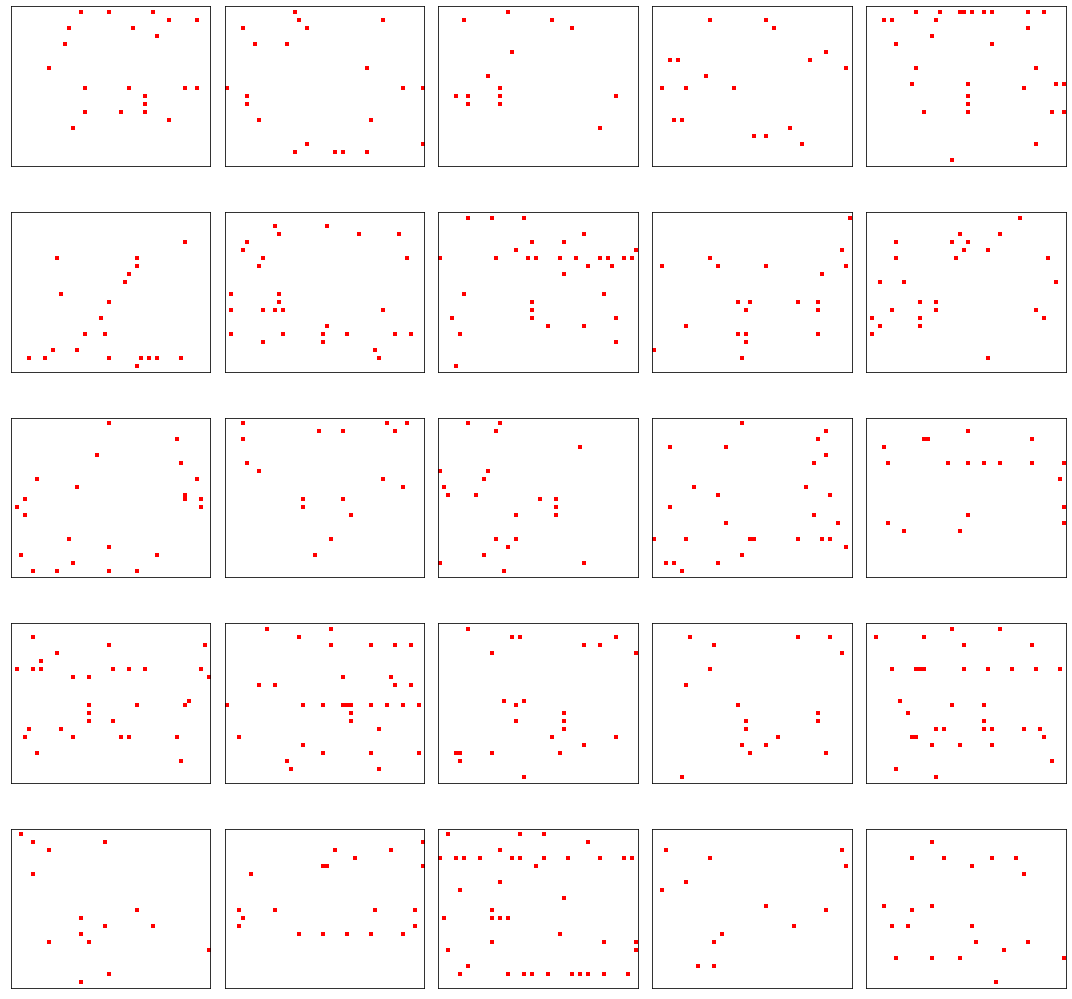

In [32]:
import matplotlib.pyplot as plt
import copy

def plot_image(img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    cmap = copy.copy(plt.cm.get_cmap("rainbow"))
    cmap.set_under(color='white') 
    plt.imshow(img, cmap=cmap, vmin=1e-7)
    
    #plt.xlabel("%d" %(label))

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    b=100
    plot_image(xzyz_imgs_vertical[i+b])
    
    plt.subplots_adjust(wspace = 0.5 )
plt.tight_layout()
plt.show()

In [33]:
xzyz_imgs_vertical[0]

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.00340136,  0.00340136, ...,  0.00340136,
         0.00340136, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ...,  0.00340136,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ]])